# 데이터 불러오기

In [2]:
import pandas

In [46]:
pandas.read_csv('./data/쇼핑몰데이터/customer_master.csv')

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시
...,...,...,...,...,...,...,...,...
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시


In [47]:
import pandas as pd

In [48]:
customer_master=pd.read_csv('./data/쇼핑몰데이터/customer_master.csv')
customer_master.head()
customer_master.tail()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시
4999,HI349563,정지석,2019-07-31 22:49,horii_kanji@example.com,M,21,1998-02-06,서울특별시


# 데이터 병합

In [49]:
transaction_1=pd.read_csv('./data/쇼핑몰데이터/transaction_1.csv')
transaction_2=pd.read_csv('./data/쇼핑몰데이터/transaction_2.csv')

In [50]:
transaction_1.head()
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [51]:
transaction=pd.concat([transaction_1,transaction_2],ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [52]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [53]:
transaction_detail_1 = pd.read_csv('./data/쇼핑몰데이터/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('./data/쇼핑몰데이터/transaction_detail_2.csv')

In [54]:
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [55]:
item_master = pd.read_csv('./data/쇼핑몰데이터/item_master.csv')

In [56]:
tt=pd.merge(transaction_detail,transaction,on = 'transaction_id',how='left')
tt.head()

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865


In [57]:
transaction['price'].sum()

971135000

In [58]:
tt['price'].sum()

1074750000

In [70]:
join_data = pd.merge(transaction_detail,transaction[['transaction_id','payment_date','customer_id']],on='transaction_id',how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:
join_data['price']=join_data['quantity']*join_data['item_price']

In [ ]:
df1 = pd.DataFrame({'lkey' : ['foo','bar','baz','foo'],'value':[1,2,3,5]})
df2 = pd.DataFrame({'rkey' : ['foo','bar','baz','foo'],'value':[5,6,7,8]})

In [ ]:
df1.merge(df2,left_on='lkey',right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [ ]:
df1=pd.DataFrame({'a':['foo','bar'],'b':[1,2]})
df2=pd.DataFrame({'a':['foo','baz'],'b':[3,4]})
df1
df2

,a,b
0,foo,3
1,baz,4


In [17]:
a = pd.merge(join_data,customer_master,on='customer_id',how='inner')
b = pd.merge(a,item_master,on='item_id',how='inner')
b.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,3494,T0000003439,S005,1,2019-04-30 02:39:00,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000
2,3495,T0000003439,S005,1,2019-04-30 02:39:00,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,753,T0000000832,S005,1,2019-02-19 19:48:24,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000


In [77]:
join_data=b

In [78]:
join_data.columns

Index(['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date',
       'customer_id', 'customer_name', 'registration_date', 'email', 'gender',
       'age', 'birth', 'pref', 'item_name', 'item_price'],
      dtype='object')

In [79]:
join_data['price']=join_data['quantity']*join_data['item_price']
join_data[['quantity','item_price','price']].head

<bound method NDFrame.head of       quantity  item_price   price
0            1      210000  210000
1            1      210000  210000
2            1      210000  210000
3            1      210000  210000
4            1      210000  210000
...        ...         ...     ...
7139         1      120000  120000
7140         1      120000  120000
7141         2      120000  240000
7142         1      120000  120000
7143         1      120000  120000

[7144 rows x 3 columns]>

In [81]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [82]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [83]:
join_data['payment_date']

0       2019-02-01 01:36:57
1       2019-04-30 02:39:00
2       2019-04-30 02:39:00
3       2019-02-01 02:47:23
4       2019-02-19 19:48:24
               ...         
7139    2019-07-30 01:01:27
7140    2019-07-30 05:07:00
7141    2019-07-30 11:08:09
7142    2019-07-30 12:50:49
7143    2019-07-31 20:25:02
Name: payment_date, Length: 7144, dtype: object

In [84]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date','payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-04-30 02:39:00,201904
2,2019-04-30 02:39:00,201904
3,2019-02-01 02:47:23,201902
4,2019-02-19 19:48:24,201902


In [86]:
join_data.groupby('payment_month').sum()['price']

C:\Users\zxcsu\AppData\Local\Temp\ipykernel_21492\4202674861.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_data.groupby('payment_month').sum()['price']


payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [87]:
join_data.groupby(['payment_month','item_name']).sum()[['price','quantity']]

C:\Users\zxcsu\AppData\Local\Temp\ipykernel_21492\2427892693.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_data.groupby(['payment_month','item_name']).sum()[['price','quantity']]


price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [88]:
pd.pivot_table(join_data,index='item_name',columns='payment_month',values=['price','quantity'],aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

# 판매월별로 상품별 매출 추이 확인

In [89]:
join_data[['item_name','payment_month','price']]

,item_name,payment_month,price
0,PC-E,201902,210000
1,PC-E,201904,210000
2,PC-E,201904,210000
3,PC-E,201902,210000
4,PC-E,201902,210000
...,...,...,...
7139,PC-C,201907,120000
7140,PC-C,201907,120000
7141,PC-C,201907,240000
7142,PC-C,201907,120000


<AxesSubplot: xlabel='payment_date', ylabel='price'>

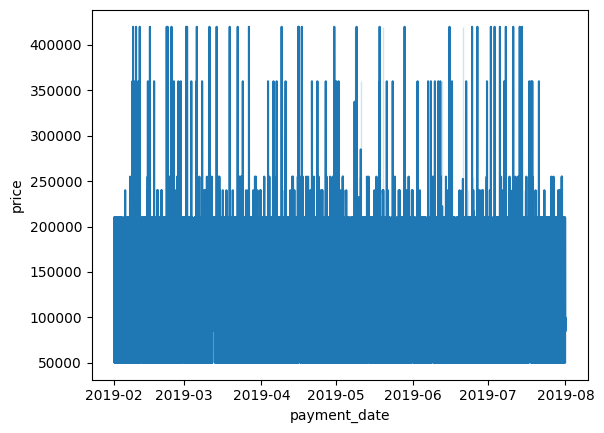

In [92]:
import seaborn as sns
sns.lineplot(data = join_data, x = 'payment_date', y = 'price')


In [93]:
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,201902
1,3494,T0000003439,S005,1,2019-04-30 02:39:00,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000,201904
2,3495,T0000003439,S005,1,2019-04-30 02:39:00,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000,210000,201904
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,201902
4,753,T0000000832,S005,1,2019-02-19 19:48:24,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,201902


In [94]:
join_data['birth'] = pd.to_datetime(join_data['birth'])
join_data['birth_year'] = join_data['birth'].dt.strftime('%Y')
join_data.groupby('birth_year').sum()['price']


C:\Users\zxcsu\AppData\Local\Temp\ipykernel_21492\665328727.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_data.groupby('birth_year').sum()['price']


birth_year
1938     4405000
1939    15300000
1940    10225000
1941    12270000
1942    14515000
          ...   
1995    13750000
1996    16085000
1997    11935000
1998    16705000
1999     6210000
Name: price, Length: 62, dtype: int64

In [95]:
graph_data = pd.pivot_table(data = join_data, index = 'payment_month', columns = 'item_name', values = 'price', aggfunc = 'sum')


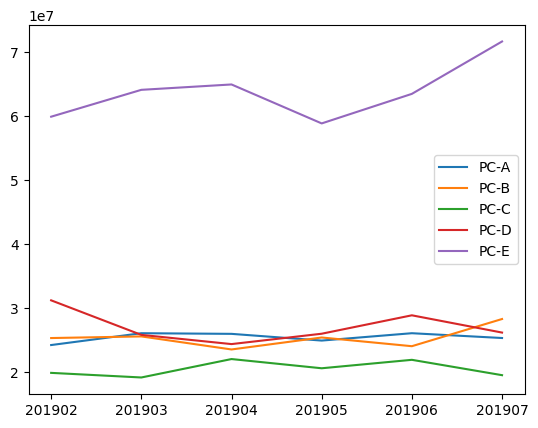

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(graph_data.index, graph_data['PC-A'], label = 'PC-A')
plt.plot(graph_data.index, graph_data['PC-B'], label = 'PC-B')
plt.plot(graph_data.index, graph_data['PC-C'], label = 'PC-C')
plt.plot(graph_data.index, graph_data['PC-D'], label = 'PC-D')
plt.plot(graph_data.index, graph_data['PC-E'], label = 'PC-E')
plt.legend()
